# L= 1

### STOCHASTIC DESCENT

In [1]:
from SD import stochastic_descent
import numpy as np
import matplotlib.pyplot as plt
from quantum_state import i

In [2]:
T = 1.8
dt = 0.01
iterations = int(1e3)

print("Total time of the protocol:", T)
print("Time step:", dt)
print("Number of timesteps:", int(T/dt))

print("Running SD for %d ietartions" %iterations)

qtarget = np.array([-1/np.sqrt(4) - 1/np.sqrt(4)*i, 1/np.sqrt(2) + 0.j])
qstart = np.array([+1/np.sqrt(4) + 1/np.sqrt(4)*i,1/np.sqrt(2) + 0.j])

percentage_flips=20
h = [-4,4]
L = 1

Total time of the protocol: 1.8
Time step: 0.01
Number of timesteps: 180
Running SD for 1000 ietartions


In [3]:
best_protocol, fidelity = stochastic_descent(qstart, qtarget, L, T, dt, iterations, 
                        flips = percentage_flips, field_list = h, verbose = True, check_norm = True)

print("Best reached fidelity:", fidelity[-1])

HO AGGIORNATO   ITERATION N° 0
HO AGGIORNATO   ITERATION N° 2
HO AGGIORNATO   ITERATION N° 4
HO AGGIORNATO   ITERATION N° 7
HO AGGIORNATO   ITERATION N° 21

Best reached fidelity: 0.9111406467001806


In [4]:
print("Best reached fidelity:", fidelity[-1])

Best reached fidelity: 0.9111406467001806


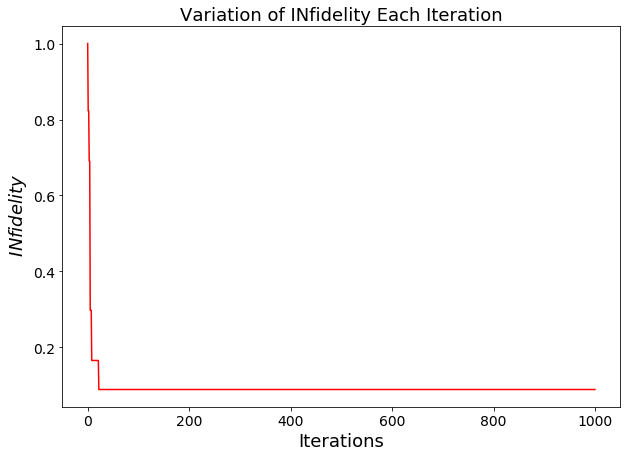

In [5]:
fig, ax = plt.subplots(figsize=(10,7))
ax.plot(np.array(1-np.array(fidelity)),color='r')
ax.set_title(r"Variation of INfidelity Each Iteration", fontsize=18)
ax.set_xlabel("Iterations", fontsize=18)
ax.set_ylabel(r" $INfidelity$", fontsize=18)
ax.tick_params(axis='both', which='major', labelsize=14) 

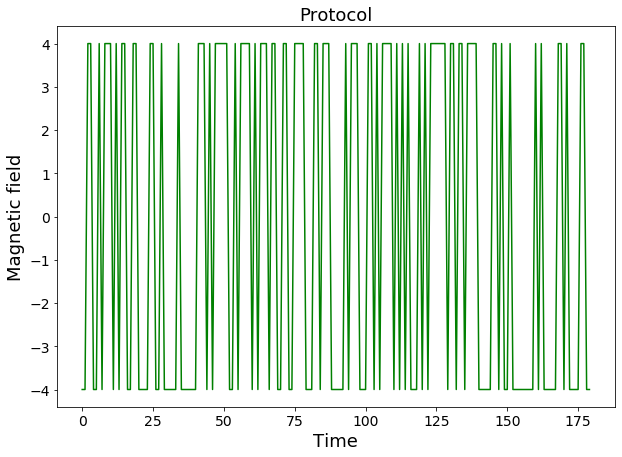

In [6]:
fig, ax = plt.subplots(figsize=(10,7))
ax.plot(best_protocol,color='g')
ax.set_title(r"Protocol", fontsize=18)
ax.set_xlabel("Time", fontsize=18)
ax.set_ylabel(r"Magnetic field", fontsize=18)
ax.tick_params(axis='both', which='major', labelsize=14)

### VISUALIZATION

In [7]:
from quantum_state import i, evolution_from_protocol, spectral_time_evolution
from qutip import basis, Bloch
from gif import qutip_qstate

In [8]:
evolution = evolution_from_protocol(qstart, qtarget, best_protocol, spectral_time_evolution, dt, L, make_gif="bloch_gif.gif")

b = Bloch()
start = qutip_qstate(qstart)
target = qutip_qstate(qtarget)
final = qutip_qstate(evolution[-1])
b.vector_color = ["g", "y", "r"]
b.add_states(start) #green
b.add_states(target) #yellow
b.add_states(final) #red

181it [01:27,  1.19it/s]


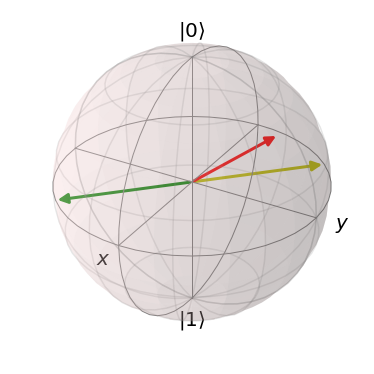

In [9]:
b.show()

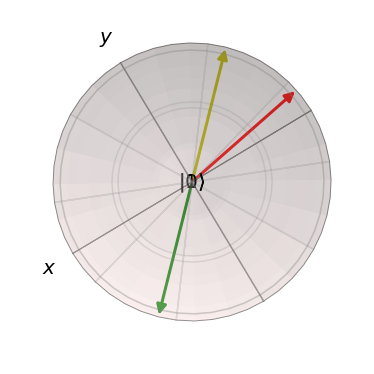

In [10]:
b.axes.view_init(-90, 30)
b.show()